# Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [3]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [4]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

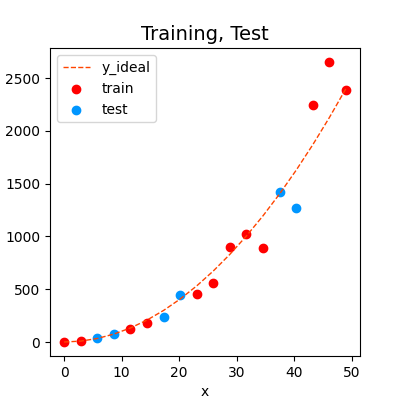

In [5]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [6]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
    ### START CODE HERE ### 
       
        err_i = (yhat[i] - y[i])**2
        err += err_i
        
    err = err / (2*m)
    
    ### END CODE HERE ### 
    
    return(err)

In [7]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

NameError: name 'test_eval_mse' is not defined

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [8]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [9]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

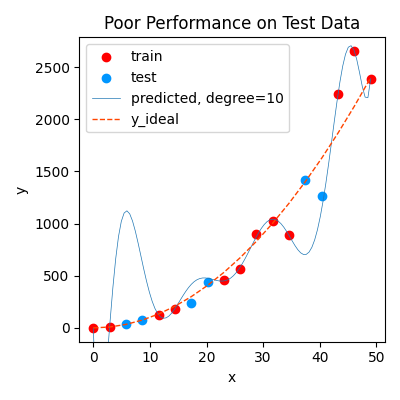

In [10]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [11]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

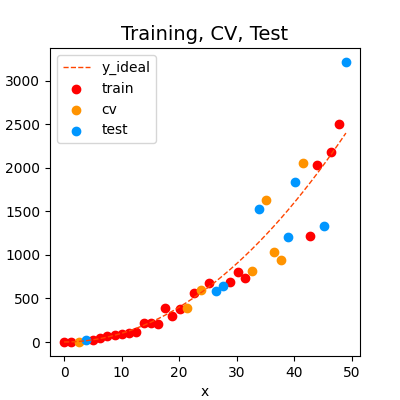

In [12]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [13]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

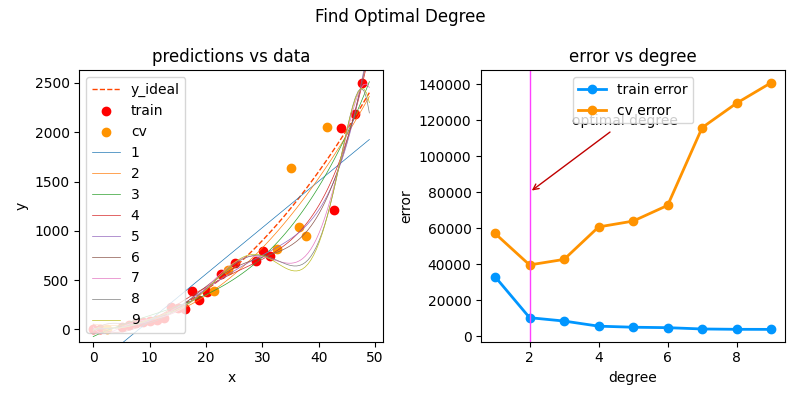

In [14]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [15]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

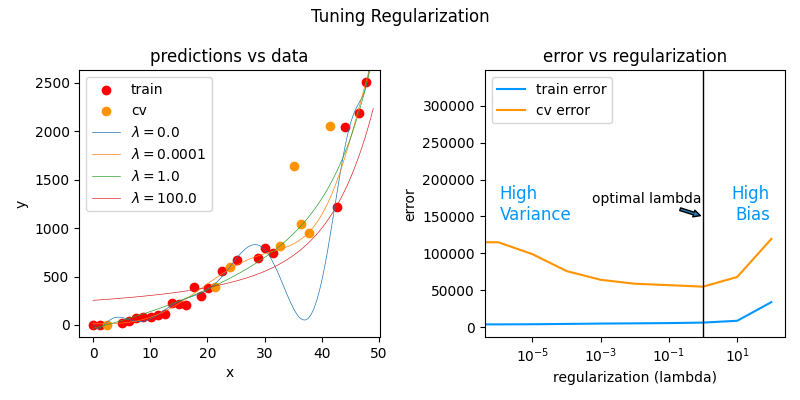

In [16]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

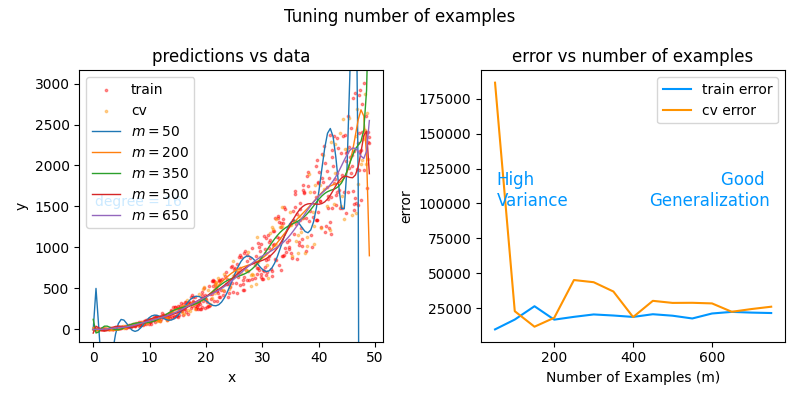

In [17]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [18]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


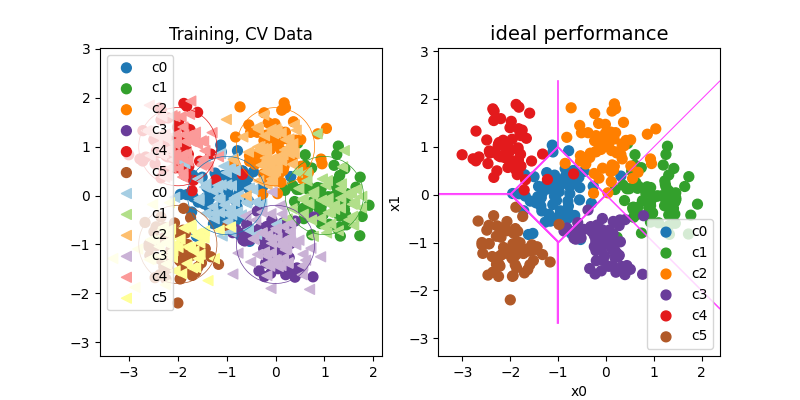

In [19]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [20]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
    ### START CODE HERE ### 
       
        if yhat[i] != y[i]:
            incorrect += 1
            
    cerr = incorrect/m
    ### END CODE HERE ### 
    
    return(cerr)

In [21]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


NameError: name 'test_eval_cat_err' is not defined

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [22]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3"),
        
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   

    ### END CODE HERE ### 
)

In [23]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.0708
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4176
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3188
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2947
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2683
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2704
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2370
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2256
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2294
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1954
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2105
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2020
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1730
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1922
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1467
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1383
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1468
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1370
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1380
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1340
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1454
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1188
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1200
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1035
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1106
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1128
Epoch 204/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1218
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1247
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1312
Epoch 207/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1402
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1115
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1103
Epoch 211/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0721
Epoch 298/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0705
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0660
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0931
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0854
Epoch 303/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1110
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 305/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1159
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1410
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1189
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1228
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1394
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1257
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0969
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0981
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0872
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0988
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 494/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0409
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 496/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0412
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0458
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 501/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 502/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0454
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 504/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0433
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1378
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1111
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0909
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0767
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1324
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1741
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0870
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0828
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0781
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0872
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0774
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0367
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1165
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0360
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 995/1000
13/1

In [24]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               360       
                                                                 
 L2 (Dense)                  (None, 40)                4840      
                                                                 
 L3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


NameError: name 'model_test' is not defined

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

1082/1082 [==============================] - 1s 829us/step


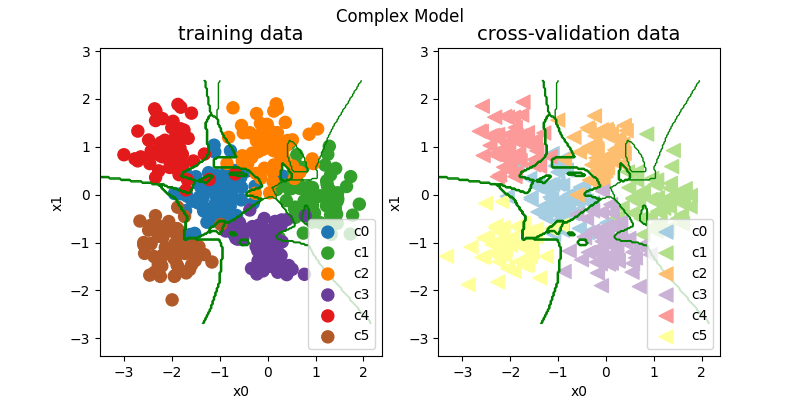

In [25]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [26]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 1ms/step
categorization error, training, complex model: 0.003
categorization error, cv,       complex model: 0.106


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [27]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        
        Dense(6, activation = 'relu', name="L1"),            
        Dense(classes, activation = 'linear', name="L2"),
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
    ### START CODE HERE ### 
)


In [28]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.8349
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.4983
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.2882
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.1311
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9891
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8429
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7304
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6356
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5610
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4985
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4472
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4094
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.2025
Epoch 102/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2039
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2041
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2006
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1990
Epoch 106/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1993
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1979
Epoch 108/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1989
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2002
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1999
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1983
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1998
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1961
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1924
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1923
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1918
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1917
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1927
Epoch 205/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1911
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1941
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1908
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1953
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1909
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1938
Epoch 211/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1921
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1897
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1879
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1910
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1892
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1930
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1873
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1953
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1891
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1876
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1883
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1896
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1848
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1896
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1906
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1877
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1869
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1891
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1864
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1864
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1860
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1861
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1844
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1865
Epoch 407/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1868
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1835
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1839
Epoch 496/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1883
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1834
Epoch 498/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1839
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1847
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1823
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1879
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1851
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1849
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1834
Epoch 505/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1839
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1838
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1847
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1826
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1867
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1827
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1835
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1819
Epoch 599/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1808
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1843
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1823
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1845
Epoch 603/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1817
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1818
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1818
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1827
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1804
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1808
Epoch 696/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 697/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1835
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1814
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1804
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1827
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1820
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1812
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1822
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1800
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1808
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1844
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1871
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1861
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1820
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1833
Epoch 799/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1807
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1795
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1816
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1826
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1802
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1834
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1804
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1822
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1806
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1815
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1809
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1811
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1790
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1802
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1823
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1824
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1841
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1831
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1826
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1832
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1840
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1817
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1814
Epoch 995/1000
13/1

In [29]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 6)                 18        
                                                                 
 L2 (Dense)                  (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


NameError: name 'model_s_test' is not defined

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 1s 809us/step


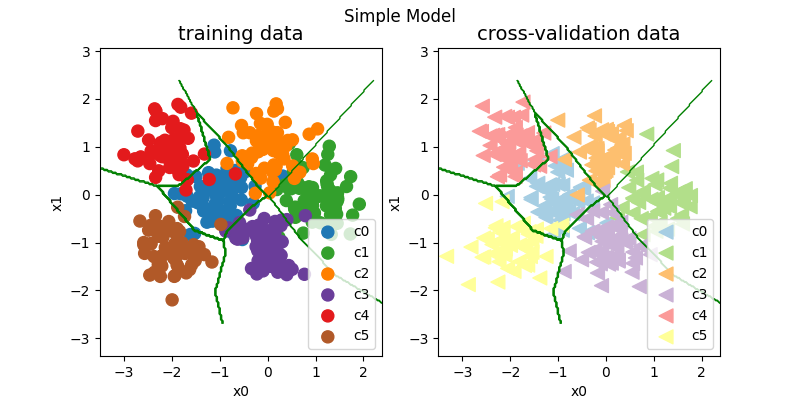

In [30]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [31]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 1ms/step
categorization error, training, simple model, 0.068, complex model: 0.003
categorization error, cv,       simple model, 0.062, complex model: 0.106


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [32]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3") 
        
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),
    ### START CODE HERE ### 
)


In [33]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 4.3930
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.5729
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.2455
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0326
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9594
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9221
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9041
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8654
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7896
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7494
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7397
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7340
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.4718
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4560
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4598
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4511
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4997
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4766
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4617
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4668
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4520
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4481
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4512
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4418
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4054
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4026
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4318
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3947
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4079
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4115
Epoch 205/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4766
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4289
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4230
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4349
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4397
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4153
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3902
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3956
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3964
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4188
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3880
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3973
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3850
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3739
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3914
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3876
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3834
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3971
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3849
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3896
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3810
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3831
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3752
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3551
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3596
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3611
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3601
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3516
Epoch 406/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3556
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3510
Epoch 494/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3496
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3495
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3700
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4036
Epoch 498/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3490
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3401
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3598
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3507
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3553
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3879
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3714
Epoch 505/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3446
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3399
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3412
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3505
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4360
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3954
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3402
Epoch 599/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3345
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3476
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3333
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3453
Epoch 603/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3916
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3809
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3471
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3458
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3328
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3352
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3315
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3323
Epoch 697/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3303
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3389
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3428
Epoch 701/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3369
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3266
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3332
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3379
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3680
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3727
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3449
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3539
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3554
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3762
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3226
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3608
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3654
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3417
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3348
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3344
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3325
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3622
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3275
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3264
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3371
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3420
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3905
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3562
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3147
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3311
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3421
Epoch 986/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3285
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3140
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3206
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3257
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3321
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3398
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3263
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3305
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3248
Epoch 995/1000
13/1

In [35]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               360       
                                                                 
 L2 (Dense)                  (None, 40)                4840      
                                                                 
 L3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


NameError: name 'model_r_test' is not defined

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 1s 853us/step


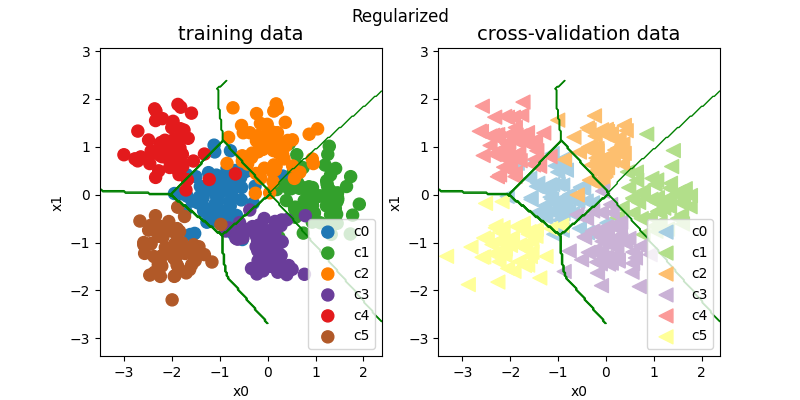

In [36]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [37]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 1ms/step
categorization error, training, regularized: 0.072, simple model, 0.068, complex model: 0.003
categorization error, cv,       regularized: 0.072, simple model, 0.062, complex model: 0.106


The simple model is a bit better in the training set than the regularized model but worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [38]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 0.9399
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4021
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3086
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2878
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2780
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2403
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2226
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2338
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1957
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2110
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2018
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1543
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1431
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1858
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 106/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1449
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1378
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1516
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1368
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1432
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1464
Epoch 113/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0839
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0907
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0781
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0820
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0820
Epoch 205/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0880
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0899
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1030
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1106
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0964
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0914
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0512
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0589
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0751
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0650
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0778
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0820
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0708
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0711
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0402
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0329
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0370
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0406
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0608
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0789
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1066
Epoch 407/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0758
Epoch 494/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0855
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0701
Epoch 496/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0389
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0342
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0342
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0430
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0466
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 599/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 603/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0574
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0625
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0523
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0491
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0453
Epoch 696/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0428
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0412
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 701/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0427
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 799/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0368
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0330
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0329
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 986/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0277
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 995/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2472
Epoch 83/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2315
Epoch 84/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2365
Epoch 85/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 86/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2284
Epoch 87/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2260
Epoch 88/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2344
Epoch 89/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2312
Epoch 90/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2268
Epoch 91/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2174
Epoch 92/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2157
Epoch 93/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2197
Epoch 94/1000
13/13 [=========

13/13 [==============================] - 0s 1ms/step - loss: 0.2191
Epoch 182/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2126
Epoch 183/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2116
Epoch 184/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2155
Epoch 185/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2123
Epoch 186/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2022
Epoch 187/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2019
Epoch 188/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2056
Epoch 189/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2024
Epoch 190/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2123
Epoch 191/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2240
Epoch 192/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2056
Epoch 193/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1975
Epoch 280/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1989
Epoch 281/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1979
Epoch 282/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1933
Epoch 283/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2056
Epoch 284/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1892
Epoch 285/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1853
Epoch 286/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1947
Epoch 287/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1942
Epoch 288/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2186
Epoch 289/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2091
Epoch 290/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2062
Epoch 291/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1775
Epoch 378/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1819
Epoch 379/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1837
Epoch 380/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 381/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1837
Epoch 382/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1885
Epoch 383/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1991
Epoch 384/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1917
Epoch 385/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1823
Epoch 386/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1825
Epoch 387/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1818
Epoch 388/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1776
Epoch 389/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1894
Epoch 476/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1792
Epoch 477/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1912
Epoch 478/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2034
Epoch 479/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1904
Epoch 480/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1820
Epoch 481/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1773
Epoch 482/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1815
Epoch 483/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1907
Epoch 484/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1862
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1768
Epoch 486/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1739
Epoch 487/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1844
Epoch 574/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1703
Epoch 575/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1682
Epoch 576/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1615
Epoch 577/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1673
Epoch 578/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1724
Epoch 579/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1641
Epoch 580/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 581/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1716
Epoch 582/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1602
Epoch 583/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1674
Epoch 584/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1876
Epoch 585/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1645
Epoch 672/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1717
Epoch 673/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1624
Epoch 674/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1701
Epoch 675/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1708
Epoch 676/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570
Epoch 677/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1606
Epoch 678/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1638
Epoch 679/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1783
Epoch 680/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1772
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1783
Epoch 682/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1743
Epoch 683/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1502
Epoch 770/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1524
Epoch 771/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1648
Epoch 772/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1520
Epoch 773/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1654
Epoch 774/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1669
Epoch 775/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1652
Epoch 776/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1514
Epoch 777/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554
Epoch 778/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615
Epoch 779/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1542
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585
Epoch 781/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1562
Epoch 868/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1603
Epoch 869/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1503
Epoch 870/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555
Epoch 871/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1541
Epoch 872/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1416
Epoch 873/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1489
Epoch 874/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1424
Epoch 875/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1474
Epoch 876/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1537
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1503
Epoch 878/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1595
Epoch 879/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1573
Epoch 966/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1586
Epoch 967/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1683
Epoch 968/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1784
Epoch 969/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1655
Epoch 970/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1575
Epoch 971/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1536
Epoch 972/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1507
Epoch 973/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1527
Epoch 974/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1565
Epoch 975/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1629
Epoch 976/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1465
Epoch 977/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3608
Epoch 65/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3627
Epoch 66/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3397
Epoch 67/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3617
Epoch 68/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3600
Epoch 69/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3233
Epoch 70/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3174
Epoch 71/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3181
Epoch 72/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2992
Epoch 73/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3065
Epoch 74/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3075
Epoch 75/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3232
Epoch 76/1000
13/13 [=========

13/13 [==============================] - 0s 1ms/step - loss: 0.2862
Epoch 164/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2919
Epoch 165/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2947
Epoch 166/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3036
Epoch 167/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2941
Epoch 168/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2852
Epoch 169/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2844
Epoch 170/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2883
Epoch 171/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2766
Epoch 172/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2624
Epoch 173/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2849
Epoch 174/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3001
Epoch 175/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2830
Epoch 262/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2611
Epoch 263/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2695
Epoch 264/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2579
Epoch 265/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2719
Epoch 266/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2895
Epoch 267/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2858
Epoch 268/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2676
Epoch 269/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2591
Epoch 270/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2696
Epoch 271/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2618
Epoch 272/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2652
Epoch 273/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2521
Epoch 360/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2692
Epoch 361/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2674
Epoch 362/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 363/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2872
Epoch 364/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2670
Epoch 365/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2559
Epoch 366/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2584
Epoch 367/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2773
Epoch 368/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2778
Epoch 369/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2682
Epoch 370/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2551
Epoch 371/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2358
Epoch 458/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2629
Epoch 459/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2533
Epoch 460/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2500
Epoch 461/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2827
Epoch 462/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2496
Epoch 463/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2400
Epoch 464/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2495
Epoch 465/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2671
Epoch 466/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2665
Epoch 467/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2572
Epoch 468/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2586
Epoch 469/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2453
Epoch 556/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2335
Epoch 557/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2375
Epoch 558/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2499
Epoch 559/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2807
Epoch 560/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2598
Epoch 561/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2414
Epoch 562/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2597
Epoch 563/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2350
Epoch 564/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2458
Epoch 565/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2403
Epoch 566/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2427
Epoch 567/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2291
Epoch 654/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2446
Epoch 655/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2327
Epoch 656/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2323
Epoch 657/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2327
Epoch 658/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2401
Epoch 659/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2335
Epoch 660/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2411
Epoch 661/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2303
Epoch 662/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2478
Epoch 663/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2458
Epoch 664/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2708
Epoch 665/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2349
Epoch 752/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2468
Epoch 753/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2217
Epoch 754/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2341
Epoch 755/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2280
Epoch 756/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2387
Epoch 757/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2407
Epoch 758/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2317
Epoch 759/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2310
Epoch 760/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2400
Epoch 761/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2587
Epoch 762/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2392
Epoch 763/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2214
Epoch 850/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2304
Epoch 851/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2341
Epoch 852/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2428
Epoch 853/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2274
Epoch 854/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2297
Epoch 855/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2357
Epoch 856/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2218
Epoch 857/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2334
Epoch 858/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2282
Epoch 859/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2485
Epoch 860/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2309
Epoch 861/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2388
Epoch 948/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2371
Epoch 949/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2323
Epoch 950/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2254
Epoch 951/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2267
Epoch 952/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2587
Epoch 953/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2429
Epoch 954/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2385
Epoch 955/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2236
Epoch 956/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2322
Epoch 957/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2353
Epoch 958/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2461
Epoch 959/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4525
Epoch 47/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4302
Epoch 48/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4790
Epoch 49/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4743
Epoch 50/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4384
Epoch 51/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4423
Epoch 52/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4265
Epoch 53/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4408
Epoch 54/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4196
Epoch 55/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4469
Epoch 56/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4165
Epoch 57/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4294
Epoch 58/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.3575
Epoch 146/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3573
Epoch 147/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3849
Epoch 148/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3652
Epoch 149/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3578
Epoch 150/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3537
Epoch 151/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3527
Epoch 152/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3497
Epoch 153/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3728
Epoch 154/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3531
Epoch 155/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3538
Epoch 156/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3571
Epoch 157/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3297
Epoch 244/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3421
Epoch 245/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3417
Epoch 246/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3395
Epoch 247/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3249
Epoch 248/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3378
Epoch 249/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3478
Epoch 250/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3376
Epoch 251/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3620
Epoch 252/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3405
Epoch 253/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3388
Epoch 254/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3562
Epoch 255/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3247
Epoch 342/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3296
Epoch 343/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3200
Epoch 344/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3153
Epoch 345/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3156
Epoch 346/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3233
Epoch 347/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3348
Epoch 348/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 349/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3095
Epoch 350/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3312
Epoch 351/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3134
Epoch 352/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3379
Epoch 353/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3058
Epoch 440/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3032
Epoch 441/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3115
Epoch 442/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3213
Epoch 443/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3163
Epoch 444/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3073
Epoch 445/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3184
Epoch 446/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3102
Epoch 447/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3357
Epoch 448/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3245
Epoch 449/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3076
Epoch 450/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3055
Epoch 451/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3624
Epoch 538/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3198
Epoch 539/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 540/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3155
Epoch 541/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3232
Epoch 542/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3295
Epoch 543/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3215
Epoch 544/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3112
Epoch 545/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3055
Epoch 546/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3176
Epoch 547/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3344
Epoch 548/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3099
Epoch 549/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3302
Epoch 636/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3158
Epoch 637/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3079
Epoch 638/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2986
Epoch 639/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 640/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2909
Epoch 641/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2909
Epoch 642/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3104
Epoch 643/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3233
Epoch 644/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2964
Epoch 645/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3130
Epoch 646/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3263
Epoch 647/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2973
Epoch 734/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3201
Epoch 735/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3072
Epoch 736/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3135
Epoch 737/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3202
Epoch 738/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2968
Epoch 739/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3039
Epoch 740/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3050
Epoch 741/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3248
Epoch 742/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3595
Epoch 743/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3005
Epoch 744/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 745/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3061
Epoch 832/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3061
Epoch 833/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3034
Epoch 834/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2960
Epoch 835/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2876
Epoch 836/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2855
Epoch 837/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2937
Epoch 838/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3006
Epoch 839/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2913
Epoch 840/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3042
Epoch 841/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2851
Epoch 842/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3078
Epoch 843/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3090
Epoch 930/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3162
Epoch 931/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3000
Epoch 932/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2937
Epoch 933/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2962
Epoch 934/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3261
Epoch 935/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2949
Epoch 936/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2896
Epoch 937/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2883
Epoch 938/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3082
Epoch 939/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2992
Epoch 940/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2910
Epoch 941/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.6120
Epoch 29/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5998
Epoch 30/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6190
Epoch 31/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6090
Epoch 32/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6307
Epoch 33/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6098
Epoch 34/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6621
Epoch 35/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6568
Epoch 36/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6315
Epoch 37/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5900
Epoch 38/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5668
Epoch 39/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5654
Epoch 40/1000
13/13 [=========

13/13 [==============================] - 0s 1ms/step - loss: 0.4438
Epoch 128/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4315
Epoch 129/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4396
Epoch 130/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4365
Epoch 131/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4667
Epoch 132/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4353
Epoch 133/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4233
Epoch 134/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4494
Epoch 135/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4460
Epoch 136/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4525
Epoch 137/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4286
Epoch 138/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4464
Epoch 139/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4339
Epoch 226/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4310
Epoch 227/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4604
Epoch 228/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3979
Epoch 229/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4001
Epoch 230/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4129
Epoch 231/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4001
Epoch 232/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4130
Epoch 233/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3908
Epoch 234/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3869
Epoch 235/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3872
Epoch 236/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3936
Epoch 237/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4163
Epoch 324/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4105
Epoch 325/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3969
Epoch 326/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3856
Epoch 327/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3773
Epoch 328/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3943
Epoch 329/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3768
Epoch 330/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3651
Epoch 331/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3681
Epoch 332/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3702
Epoch 333/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4082
Epoch 334/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3938
Epoch 335/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3756
Epoch 422/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3900
Epoch 423/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3666
Epoch 424/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3677
Epoch 425/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3558
Epoch 426/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3564
Epoch 427/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3582
Epoch 428/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3684
Epoch 429/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3653
Epoch 430/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3621
Epoch 431/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3494
Epoch 432/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3562
Epoch 433/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3594
Epoch 520/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3602
Epoch 521/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3419
Epoch 522/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3583
Epoch 523/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3766
Epoch 524/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3356
Epoch 525/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3429
Epoch 526/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3529
Epoch 527/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3340
Epoch 528/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3406
Epoch 529/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3735
Epoch 530/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3614
Epoch 531/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3226
Epoch 618/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3647
Epoch 619/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4111
Epoch 620/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3928
Epoch 621/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3525
Epoch 622/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3377
Epoch 623/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3329
Epoch 624/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3311
Epoch 625/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3278
Epoch 626/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3368
Epoch 627/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3501
Epoch 628/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3680
Epoch 629/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3245
Epoch 716/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3305
Epoch 717/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3487
Epoch 718/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3712
Epoch 719/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3485
Epoch 720/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3566
Epoch 721/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3633
Epoch 722/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3431
Epoch 723/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3673
Epoch 724/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3604
Epoch 725/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3965
Epoch 726/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3611
Epoch 727/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3304
Epoch 814/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3313
Epoch 815/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3404
Epoch 816/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3408
Epoch 817/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3562
Epoch 818/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3502
Epoch 819/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3226
Epoch 820/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3635
Epoch 821/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3883
Epoch 822/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3427
Epoch 823/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3462
Epoch 824/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3412
Epoch 825/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3277
Epoch 912/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3247
Epoch 913/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3186
Epoch 914/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3499
Epoch 915/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3472
Epoch 916/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3530
Epoch 917/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3407
Epoch 918/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3341
Epoch 919/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 920/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3743
Epoch 921/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3382
Epoch 922/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3432
Epoch 923/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 1.0290
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9949
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9584
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9420
Epoch 13/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9401
Epoch 14/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9372
Epoch 15/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8960
Epoch 16/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8843
Epoch 17/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9073
Epoch 18/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9027
Epoch 19/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8680
Epoch 20/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8480
Epoch 21/1000
13/13 [=========

Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5625
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5676
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5666
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5529
Epoch 113/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5465
Epoch 114/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5481
Epoch 115/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5524
Epoch 116/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5516
Epoch 117/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5832
Epoch 118/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5841
Epoch 119/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5704
Epoch 120/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5663
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.5160
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5081
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5315
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5018
Epoch 211/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4978
Epoch 212/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4878
Epoch 213/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4934
Epoch 214/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4920
Epoch 215/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4881
Epoch 216/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5027
Epoch 217/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5012
Epoch 218/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4858
Epoch 219/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4637
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4858
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4632
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4469
Epoch 309/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4608
Epoch 310/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4645
Epoch 311/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4487
Epoch 312/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4519
Epoch 313/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4596
Epoch 314/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4608
Epoch 315/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4512
Epoch 316/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4465
Epoch 317/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4416
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4280
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4336
Epoch 407/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4460
Epoch 408/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4653
Epoch 409/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4256
Epoch 410/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4462
Epoch 411/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4803
Epoch 412/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4331
Epoch 413/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4410
Epoch 414/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4505
Epoch 415/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4122
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4217
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4511
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4573
Epoch 505/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4506
Epoch 506/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4623
Epoch 507/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4577
Epoch 508/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4104
Epoch 509/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4228
Epoch 510/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4153
Epoch 511/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4240
Epoch 512/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4290
Epoch 513/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3999
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4131
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3979
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4062
Epoch 603/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3988
Epoch 604/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4033
Epoch 605/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4048
Epoch 606/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4319
Epoch 607/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4245
Epoch 608/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4289
Epoch 609/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4081
Epoch 610/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4305
Epoch 611/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3986
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4160
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3993
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3838
Epoch 701/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4004
Epoch 702/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3995
Epoch 703/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3812
Epoch 704/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4084
Epoch 705/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3999
Epoch 706/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4079
Epoch 707/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4184
Epoch 708/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4029
Epoch 709/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4636
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4423
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3944
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3958
Epoch 799/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3939
Epoch 800/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3943
Epoch 801/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3881
Epoch 802/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3824
Epoch 803/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3772
Epoch 804/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3697
Epoch 805/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3862
Epoch 806/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3902
Epoch 807/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3900
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3859
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4089
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3957
Epoch 897/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3958
Epoch 898/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3984
Epoch 899/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4014
Epoch 900/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3945
Epoch 901/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4116
Epoch 902/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4057
Epoch 903/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4119
Epoch 904/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3786
Epoch 905/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3901
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3665
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3962
Epoch 995/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3848
Epoch 996/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3735
Epoch 997/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4049
Epoch 998/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3758
Epoch 999/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4004
Epoch 1000/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4098
Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 9.9158
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.2824


13/13 [==============================] - 0s 1ms/step - loss: 0.6880
Epoch 91/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6870
Epoch 92/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6871
Epoch 93/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6789
Epoch 94/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6799
Epoch 95/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6816
Epoch 96/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6706
Epoch 97/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6755
Epoch 98/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6815
Epoch 99/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 100/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6989
Epoch 101/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7037
Epoch 102/1000
13/13 [======

Epoch 189/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5785
Epoch 190/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5706
Epoch 191/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5909
Epoch 192/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5900
Epoch 193/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5729
Epoch 194/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5701
Epoch 195/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5660
Epoch 196/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5649
Epoch 197/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5810
Epoch 198/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5658
Epoch 199/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5732
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5686
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.5647
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5548
Epoch 289/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5345
Epoch 290/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5390
Epoch 291/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5456
Epoch 292/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5223
Epoch 293/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5281
Epoch 294/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5304
Epoch 295/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5582
Epoch 296/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5303
Epoch 297/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5218
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5273
Epoch 299/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.5033
Epoch 386/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4858
Epoch 387/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5018
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5079
Epoch 389/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4988
Epoch 390/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4849
Epoch 391/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4911
Epoch 392/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4949
Epoch 393/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4907
Epoch 394/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4929
Epoch 395/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5255
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5378
Epoch 397/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5184
Epoch 484/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4768
Epoch 485/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5035
Epoch 486/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4818
Epoch 487/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4747
Epoch 488/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4662
Epoch 489/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4569
Epoch 490/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4713
Epoch 491/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4786
Epoch 492/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4987
Epoch 493/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4778
Epoch 494/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4596
Epoch 495/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4899
Epoch 582/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4785
Epoch 583/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4762
Epoch 584/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4678
Epoch 585/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4923
Epoch 586/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4909
Epoch 587/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4621
Epoch 588/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4467
Epoch 589/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4376
Epoch 590/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4387
Epoch 591/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4501
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4466
Epoch 593/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4491
Epoch 680/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4374
Epoch 681/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4608
Epoch 682/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4431
Epoch 683/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4434
Epoch 684/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4407
Epoch 685/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4453
Epoch 686/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4535
Epoch 687/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4553
Epoch 688/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4315
Epoch 689/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4702
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4616
Epoch 691/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4599
Epoch 778/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4514
Epoch 779/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4422
Epoch 780/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4353
Epoch 781/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4585
Epoch 782/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4234
Epoch 783/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4353
Epoch 784/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4355
Epoch 785/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4185
Epoch 786/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4255
Epoch 787/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4204
Epoch 789/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4206
Epoch 876/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4356
Epoch 877/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4225
Epoch 878/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4247
Epoch 879/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4215
Epoch 880/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4254
Epoch 881/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4418
Epoch 882/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4516
Epoch 883/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4843
Epoch 884/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4704
Epoch 885/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4567
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4091
Epoch 887/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4182
Epoch 974/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4215
Epoch 975/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4198
Epoch 976/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4133
Epoch 977/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4174
Epoch 978/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4057
Epoch 979/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4193
Epoch 980/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4379
Epoch 981/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4275
Epoch 982/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4200
Epoch 983/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4056
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4235
Epoch 985/1000
13/1

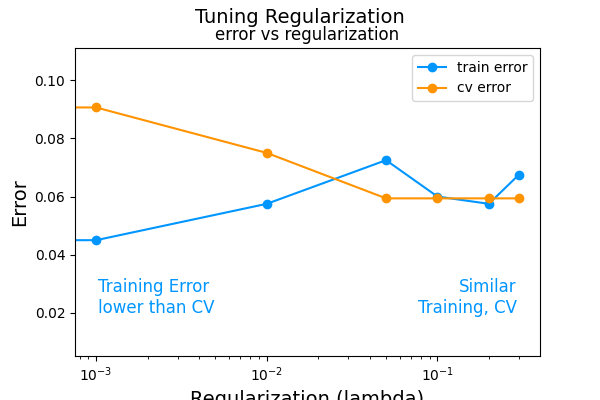

In [39]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 1ms/step


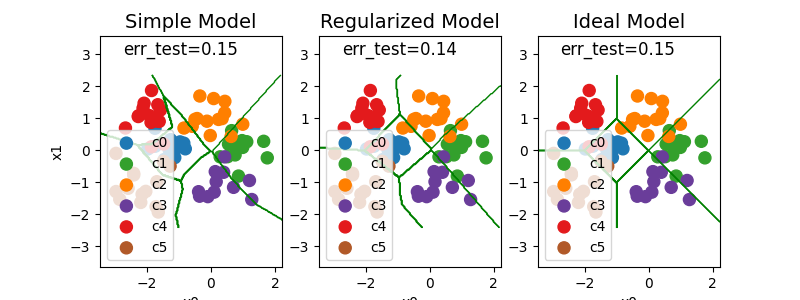

In [40]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://drive.google.com/uc?export=view&id=14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center" alt="unlock_cells.gif">
</details>